<a href="https://colab.research.google.com/github/clionelove123/Machine_Learning/blob/main/ML_Chap_05_RBF_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Code Reference: https://github.com/artisan1218/RBF-Network/blob/main/RBF_Network.ipynb

import matplotlib.pyplot as plt
import numpy as np
import math
import random
import statistics as stat

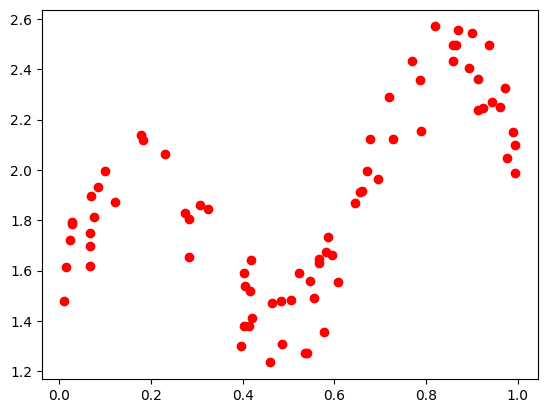

In [51]:
def generate_data_points(num_data_points):
  y_list = []
  desired_y_list = []
  x_list = []

  for i in range(num_data_points):
    x = np.random.uniform(0.0, 1.0)
    x_list.append(x)
    y = 0.5 + 0.4 * math.sin(3 * math.pi * x) + np.exp (0.5 * x)
    noise = np.random.uniform(-0.2, 0.2)
    y_noise = y + noise
    y_list.append(y_noise)
    desired_y_list.append(y)
  return x_list, y_list, desired_y_list

x_list, y_list, desired_y_list = generate_data_points(75)
data = np.array([x_list, y_list])

#print(data)
#print(data[0][0])

clusters_x = np.random.choice(np.squeeze(data[0]), size=1)
clusters_y = np.random.choice(np.squeeze(data[1]), size=1)
clusters = np.array([clusters_x, clusters_y])

plt.plot(x_list, y_list, 'ro')

In [52]:
'''
implementation of k-means
'''
def kmeans(data, num_clusters):
  # randomly generate num_clusters clusters from the data point
  clusters_x = np.random.choice(np.squeeze(data[0]), size=num_clusters)
  clusters_y = np.random.choice(np.squeeze(data[1]), size=num_clusters)
  clusters = np.array([clusters_x, clusters_y])
  prev_clusters = clusters.copy()
  variance = np.zeros(num_clusters) # initialize all variance to zero
  converged = False
  all_same_variance = 0

  dp, num_clusters = (len(data[0]), num_clusters) # distance is a 2d array, x axis is the data point, y axis is the cluster
  # distance[i][j][0] means the squared distance from the ith data point to jth cluster
  # distance[i][j][1] means the x axis of that the i data point
  # distance[i][j][2] means the y axis of that the i data point
  distance = np.array([[[0.0, 0.0, 0.0] for i in range(dp)] for j in range(num_clusters)])

  while not converged:
    # compute the distance from each data point to each clusters and store it in a 2darray
    for i in range(num_clusters): # for all the clusters
      cluster = [clusters[0][i], clusters[1][i]] # get one cluster
      for j in range(len(data[0])): # for all the data point
        dp = [data[0][j], data[1][j]] # get one dp
        squared_distance = (cluster[0] - dp[0])**2 + (cluster[1] - dp[1])**2
        all_same_variance += squared_distance
        distance[i][j][0] = squared_distance
        distance[i][j][1] = dp[0] # x coordinate
        distance[i][j][2] = dp[1] # y coordinate

    distanceT = distance.transpose(1,0,2)
    current_cluster_index = 0
    smallest_data_point_x = 0
    smallest_data_point_y = 0
    smallestDistance = 1000 # set to a big number
    clusters.fill(0)
    num_dp_belongs_to_each_cluster = [1 for i in range(num_clusters)]
    cluster_dp_x = [[] for i in range(num_clusters)] # holds x axis of all datapoints belong to cluster i
    cluster_dp_y = [[] for i in range(num_clusters)] # holds y axis of all datapoints belong to cluster i

    for i in range(len(distanceT)): # number of data point
      for j in range(len(distanceT[i])): # for each distance from the cluster to the i data point
        dis = distanceT[i][j][0] # the squared distance at data point i at cluster j
        if dis < smallestDistance:
          smallestDistance = dis
          smallest_data_point_x = distanceT[i][j][1]
          smallest_data_point_y = distanceT[i][j][2]
          current_cluster_index = j
      smallestDistance = 1000
      num_dp_belongs_to_each_cluster[current_cluster_index] += 1
      clusters[0][current_cluster_index] += smallest_data_point_x
      cluster_dp_x[current_cluster_index].append(smallest_data_point_x)
      clusters[1][current_cluster_index] += smallest_data_point_y
      cluster_dp_y[current_cluster_index].append(smallest_data_point_y)

    # calculate the means
    for i in range(num_clusters):
      clusters[0][i] = clusters[0][i] / num_dp_belongs_to_each_cluster[i]
      clusters[1][i] = clusters[1][i] / num_dp_belongs_to_each_cluster[i]

    # if the difference between the current cluster and previous cluster is small, the it converged.
    converged = np.linalg.norm(clusters - prev_clusters) < 1e-6
    prev_clusters = clusters.copy()

  clusters = clusters.transpose()
  clustersWithNoPoints = []
  for i in range(num_clusters):
    dp_for_cluster = num_dp_belongs_to_each_cluster[i]
    if dp_for_cluster < 2:
      # keep track of clusters with no points or 1 point
      clustersWithNoPoints.append(i)
      continue
    else:
      distance_dp_to_cluster = []
      for j in range(len(cluster_dp_x[i])):
        cluster_x = clusters[i][0]
        clsuter_y = clusters[i][1]
        dp_x = cluster_dp_x[i][j]
        dp_y = cluster_dp_y[i][j]
        delta_x_square = (cluster_x - dp_x)**2
        delta_y_square = (clsuter_y - dp_y)**2
        distance_dp_to_cluster.append(math.sqrt(delta_x_square + delta_y_square))
      if len(distance_dp_to_cluster) < 2:
        variance[i] = 0
      else:
        variance[i] = stat.variance(distance_dp_to_cluster) # assign x variance of the i cluster to the ith idnex

  # if there are clusters with 0 or 1 points, take the mean variance of the other clusters
  if len(clustersWithNoPoints) > 0:
    avg_variance_all_other_clusters = []

    for i in range(num_clusters):
      if i not in clustersWithNoPoints:
        avg_variance_all_other_clusters.append(variance[i])
    variance[clustersWithNoPoints] = np.mean(avg_variance_all_other_clusters)

  all_same_variance = all_same_variance/num_clusters
  all_same_variance = np.array([all_same_variance for i in range(len(variance))])

  return clusters, variance

# test result
clusters, variance = kmeans(data, num_clusters=3)
print('Final clusters: ', clusters)
print('Final variance: ', variance)

Final clusters:  [[0.81270199 2.17063731]
 [0.47905818 1.4295865 ]
 [0.12808439 1.73988512]]
Final variance:  [0.00877806 0.00531199 0.00927777]


In [53]:
'''
Implementation of the RBF network including regression
'''

def rbf(x, centers, variance):
    return np.exp(-np.linalg.norm(centers - x)**2)

class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=3, lr=0.01, epochs=100, rbf=rbf):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
      # compute variance from data
      self.centers, self.variance = kmeans(X, self.k)


      # training
      X = X.transpose()
      for epoch in range(self.epochs):
        for i in range(X.shape[0]):
            # forward pass
            a = np.array([self.rbf(X[i], center, variance) for center, variance, in zip(self.centers, self.variance)])
            F = a.T.dot(self.w) + self.b
            loss = (y[i] - F).flatten() ** 2

            # backward pass
            error = -(y[i] - F).flatten()

            # online update
            #self.w = self.w - self.lr * a.dot(error)
            self.w = self.w - self.lr * a * error
            self.b = self.b - self.lr * error

    def predict(self, X):
      y_pred = []
      X = X.transpose()
      for i in range(len(X)):
        a = np.array([rbf(X[i], center, variance) for center, variance, in zip(self.centers, self.variance)])
        F = a.T.dot(self.w) + self.b
        y_pred.append(F)
      return y_pred

Predication accuracy of points:  0.48
Average error of all points:  0.09752865876122423
[[0.         0.        ]
 [0.12808439 1.73988512]
 [0.         0.        ]
 [0.47905818 1.4295865 ]
 [0.81270199 2.17063731]]


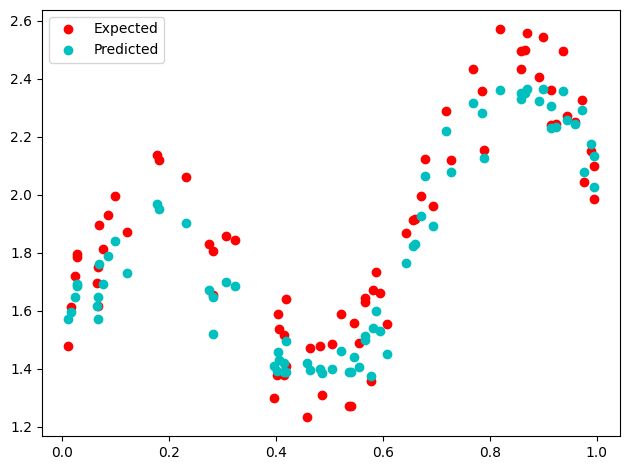

In [55]:
# create the RNF network
rbfnet = RBFNet(lr=0.1, k=5)
# training process
rbfnet.fit(data, desired_y_list)
# make prediction using the network
y_pred = rbfnet.predict(data)

# plot the result
plt.plot(data[0], y_list, 'ro', label='Expected')
plt.plot(data[0], y_pred, 'co', label='Predicted')

# calculating the accuracy and average error
num_correct_prediction_points = 0
for i in range(len(y_list)):
  if abs(y_pred[i] - y_list[i]) < 1e-1:
    num_correct_prediction_points += 1
print('Predication accuracy of points: ', num_correct_prediction_points/len(y_list))

avgError = np.mean([abs(y_pred[i] - y_list[i]) for i in range(len(y_list))])
print('Average error of all points: ', avgError)

print(rbfnet.centers)

plt.legend()
plt.tight_layout()
plt.show()